In [2]:
!pip install qiskit
import qiskit 


  Using cached qiskit-1.0.2-cp38-abi3-win_amd64.whl.metadata (12 kB)
Using cached qiskit-1.0.2-cp38-abi3-win_amd64.whl (4.1 MB)


In [2]:
import qiskit

In [6]:
!pip install qiskit_aer

  Using cached qiskit_aer-0.13.3-cp311-cp311-win_amd64.whl.metadata (6.2 kB)
Using cached qiskit_aer-0.13.3-cp311-cp311-win_amd64.whl (9.5 MB)


In [1]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

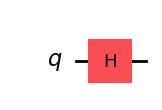

In [2]:
# Import necessary libraries
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply a single-qubit gate, for example, the Hadamard gate (H gate)
qc.h(0)

# Draw the circuit
qc.draw(output='mpl')


In [3]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

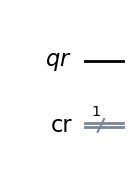

In [4]:
# Initializing quantum circuit
cr = ClassicalRegister(1, "cr")
qr = QuantumRegister(1,"qr") #Quantum Register with a single qubit
qc = QuantumCircuit(qr,cr) #Quantum Circuit
qc.draw('mpl')

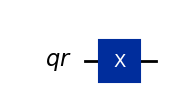

In [6]:
qc_x.x(qr_x[0]) # X Gate on 1st Qubit
qc.save_statevector()
#qc.save_unitary()
qc_x.draw('mpl')

In [7]:
!pip install qiskit.compiler

ERROR: Could not find a version that satisfies the requirement qiskit.compiler (from versions: none)
ERROR: No matching distribution found for qiskit.compiler


In [11]:
from qiskit.quantum_info import Statevector


Quantum state is: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


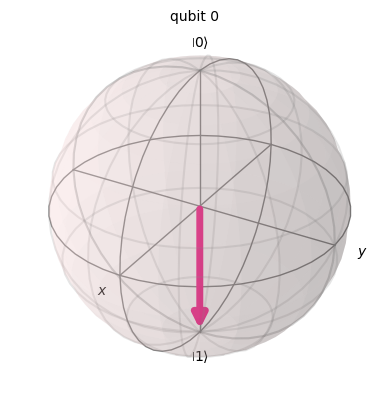

In [12]:
# Let's see the result
from qiskit.compiler import transpile
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

p=Statevector(qc_x)
p.draw('latex')

# Execute the circuit
result = transpile(qc_x, backend)
job=backend.run(qc_x)
result1=job.result()
state=result1.get_statevector(qc_x, decimals=3)

# Printing the state after X gate
print("\nQuantum state is:",state)


# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [13]:
p.draw('latex')

<IPython.core.display.Latex object>

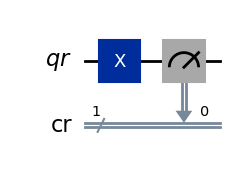

In [15]:
# X-gate on a |0> qubit and measurement
cr_x = ClassicalRegister(1, "cr")
qr_x = QuantumRegister(1, "qr") #Quantum Register with a single qubit
qc_x = QuantumCircuit(qr_x,cr_x) #Quantum Circuit
qc_x.x(qr[0]) # X Gate on 1st Qubit
qc_x.measure(0,0) # Measurement operation
qc_x.draw('mpl')

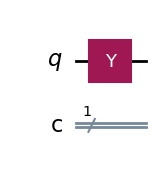

In [16]:
# Y-gate on a |0> qubit with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.draw('mpl')


Quantum state is: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


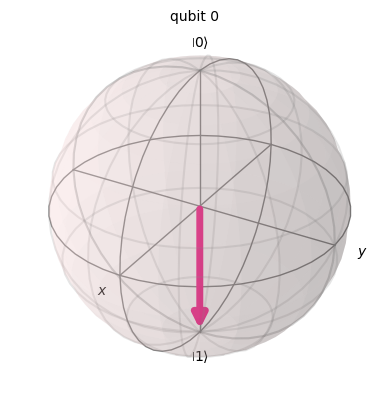

In [17]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_y, backend)
job=backend.run(qc_y)
result1=job.result()
state=result1.get_statevector(qc_y, decimals=3)


# Printing the state after Y gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [18]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

result = transpile(qc_y, backend)
job=backend.run(qc_y)
result1=job.result()
state=result1.get_unitary(qc_y, decimals=3)
print(state)

Operator([[0.-0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


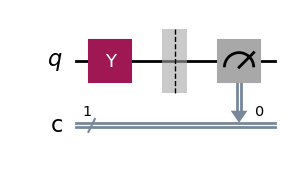

In [19]:
# Y-gate on a |0> qubit and measurement with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

In [20]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
result = transpile(qc_y, backend)
job=backend.run(result,shots=1000)

# Grab results from the job
result1 = job.result()

# Returns counts
counts = result1.get_counts(result)
print("\nTotal counts are:",counts)


Total counts are: {'1': 1000}


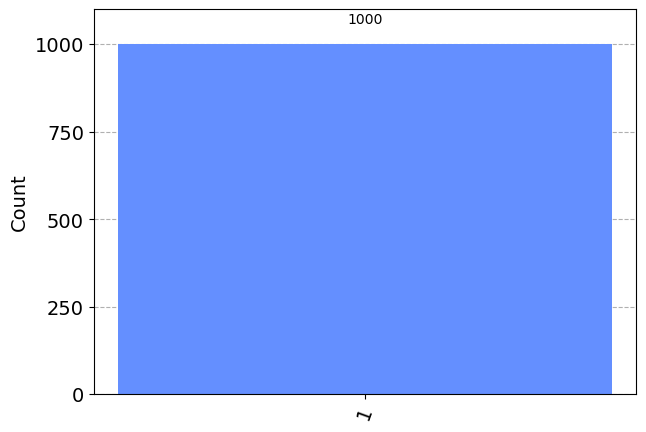

In [21]:
plot_histogram(counts)

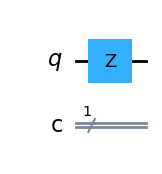

In [22]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.draw('mpl')


Quantum state is: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


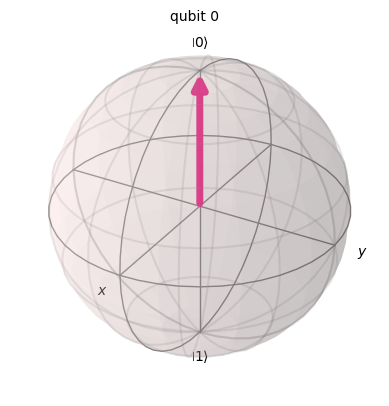

In [23]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_z, backend)
job=backend.run(result)
result1=job.result()
state=result1.get_statevector(qc_z, decimals=3)

# Printing the state after Z gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [24]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

result = transpile(qc_z, backend)
job=backend.run(qc_z)
result1=job.result()
state=result1.get_unitary(qc_z, decimals=3)
print(state)

Operator([[ 1.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))


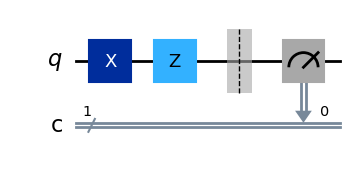

In [25]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.x(0)
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')

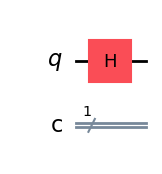

In [26]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.draw('mpl')


Quantum state is: Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


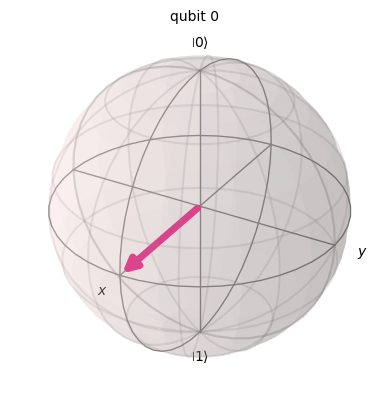

In [27]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_h, backend)
job=backend.run(qc_h)
result1=job.result()
state=result1.get_statevector(qc_h, decimals=3)


# Printing the state after Y gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [28]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

result = transpile(qc_h, backend)
job=backend.run(qc_h)
result1=job.result()
state=result1.get_unitary(qc_h, decimals=3)
print(state)

Operator([[ 0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


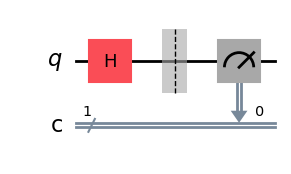

In [29]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.barrier()
qc_h.measure(0,0)
qc_h.draw('mpl')

In [30]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
result = transpile(qc_h, backend)
job=backend.run(result,shots=1000)

# Grab results from the job
result1 = job.result()

# Returns counts
counts = result1.get_counts(result)
print("\nTotal counts are:",counts)


Total counts are: {'0': 465, '1': 535}


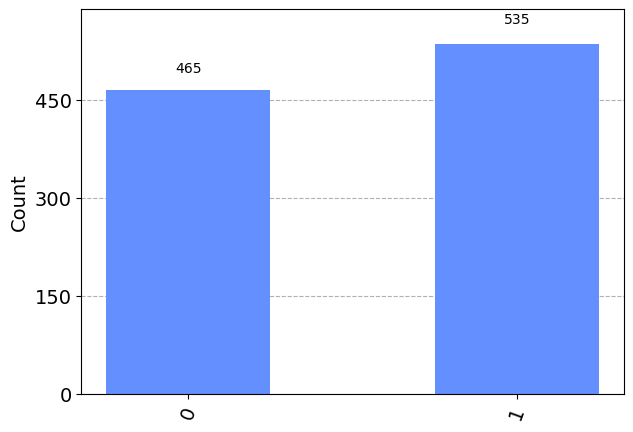

In [31]:
plot_histogram(counts)

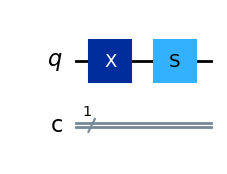

In [32]:
# S-gate on a |0> qubit with quantum circuit
qc_s = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_s.x(0)
qc_s.s(0) # S Gate on 1st Qubit
qc_s.draw('mpl')

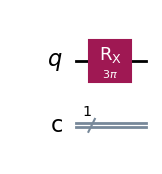

In [33]:
# RX Gate
theta_x = 3*pi
qc_rx = QuantumCircuit(1,1,name="qc")
qc_rx.rx(theta_x,0)
qc_rx.draw(output='mpl')


Quantum state is: Statevector([-0.+0.j,  0.+1.j],
            dims=(2,))


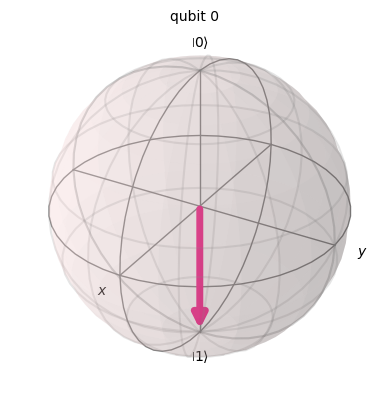

In [34]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_rx, backend)
job=backend.run(qc_rx)
result1=job.result()
state=result1.get_statevector(qc_rx, decimals=3)


# Printing the state after Y gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

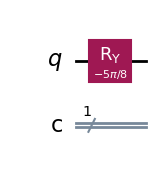

In [35]:
# RY Gate
theta_y = -5*pi/8
qc_ry = QuantumCircuit(1,1,name="qc")
qc_ry.ry(theta_y,0)
qc_ry.draw(output='mpl')


Quantum state is: Statevector([ 0.556+0.j, -0.831+0.j],
            dims=(2,))


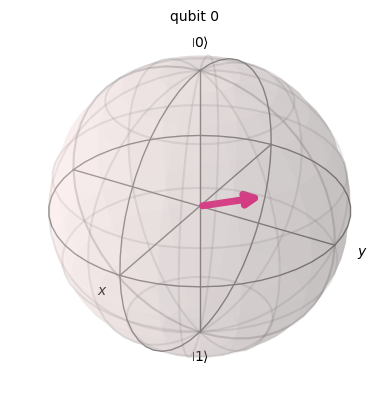

In [36]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_ry, backend)
job=backend.run(qc_ry)
result1=job.result()
state=result1.get_statevector(qc_ry, decimals=3)


# Printing the state after Y gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

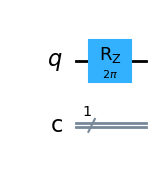

In [37]:
# RZ Gate
theta_z = 2*pi
qc_rz = QuantumCircuit(1,1,name="qc")
#qc_rz.x(0)
qc_rz.rz(theta_z,0)
qc_rz.draw(output='mpl')


Quantum state is: Statevector([-1.-0.j, -0.+0.j],
            dims=(2,))


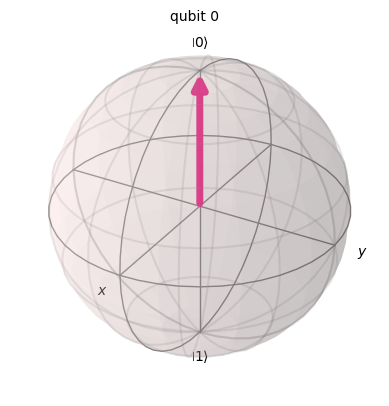

In [38]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = transpile(qc_rz, backend)
job=backend.run(qc_rz)
result1=job.result()
state=result1.get_statevector(qc_rz, decimals=3)


# Printing the state after Y gate
print("\nQuantum state is:",state)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

In [39]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram
# Import necessary libraries
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from math import pi, sqrt

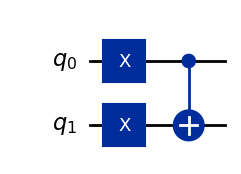

In [40]:
# CX-gate on |11> = |10> (|01> according to Qiskit ordering)
qc_cx = QuantumCircuit(2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.draw('mpl')


Quantum state is: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


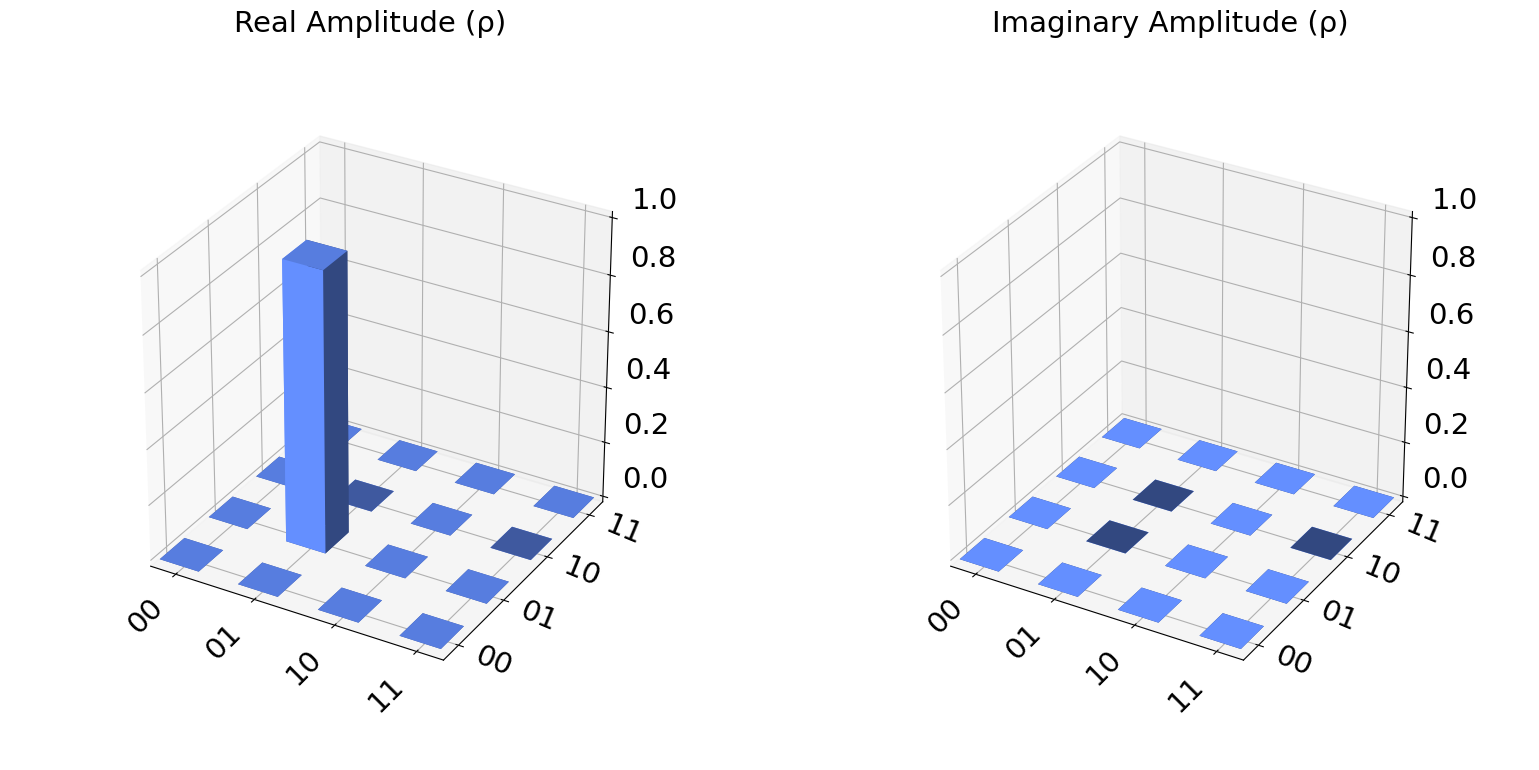

In [41]:
from qiskit.compiler import transpile
from qiskit.visualization import plot_state_city
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit 
job_state = transpile(qc_cx, simulator_state)
job=backend.run(qc_cx)
result1=job.result()
state=result1.get_statevector(qc_cx)

print("\nQuantum state is:",state)

# Plot a Density Matrix Plot
plot_state_city(state)

In [42]:
# Set the Aer simulator as Unitary for Unitary Operator
backend = Aer.get_backend('unitary_simulator')

result = transpile(qc_cx, backend)
job=backend.run(qc_cx)
result1=job.result()
state=result1.get_unitary(qc_cx, decimals=3)
print(state)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


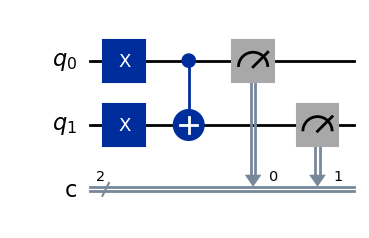

In [43]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.cx(0,1) # CX Gate with 1st Qubit as Control and 2nd Qubit as Target
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')

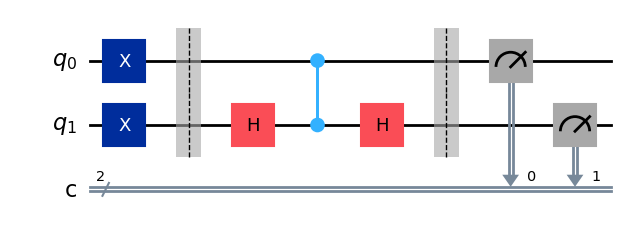

In [44]:
# CNOT with Measurement
qc_cx = QuantumCircuit(2,2,name="qc")
qc_cx.x(0) # X Gate on 1st Qubit
qc_cx.x(1) # X Gate on 2nd Qubit
qc_cx.barrier()
qc_cx.h(1) # H Gate on 2nd Qubit
qc_cx.cz(0,1) # CZ Gate
qc_cx.h(1) # H Gate on 2nd Qubit
qc_cx.barrier()
qc_cx.measure([0,1],[0,1])
qc_cx.draw('mpl')

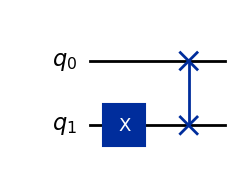

In [45]:
# SWAP Gate on |01> = |10> (|01> in Qiskit Ordering)
qc_sw = QuantumCircuit(2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.swap(0,1) # SWAP Gate Operation
qc_sw.draw(output='mpl')

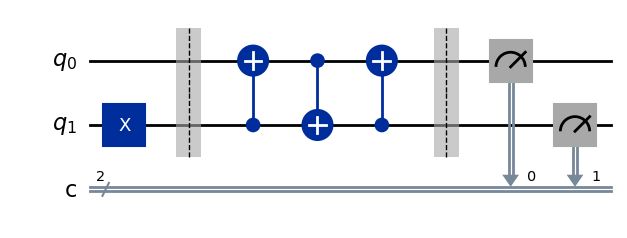

In [62]:
# SWAP Gate using CNOT - 1st Method
qc_sw = QuantumCircuit(2,2,name="qc")
qc_sw.x(1) # X Gate on 2nd Qubit
qc_sw.barrier()
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.cx(0,1) # CNOT with 1st as Control and 2nd as Target
qc_sw.cx(1,0) # CNOT with 1st as target and 2nd as Control
qc_sw.barrier()
qc_sw.measure([0,1], [0,1])
qc_sw.draw(output='mpl')

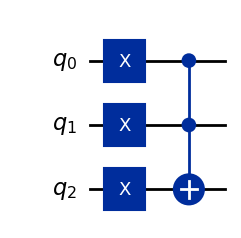

In [63]:
# CCX-gate on |111> = |110> (|011> in Qiskit ordering)
qc_ccx = QuantumCircuit(3,name="qc")
qc_ccx.x(0) # X Gate on 1st Qubit
qc_ccx.x(1) # X Gate on 2nd Qubit
qc_ccx.x(2) # X Gate on 3rd Qubit
qc_ccx.ccx(0,1,2) # CCX Gate with 1st two qubits as control and 3rd as target
qc_ccx.draw(output='mpl')

In [64]:


# Create a 4-qubit quantum circuit with 4 classical bits
qc = QuantumCircuit(4, 4)

# Apply Hadamard gate to qubits 0, 1, and 2
qc.h(range(3))

# Apply CX gate with control qubit 0 and target qubit 3
qc.cx(0, 3)

# Apply CX gate with control qubit 1 and target qubit 3
qc.cx(1, 3)

# Apply CX gate with control qubit 2 and target qubit 3
qc.cx(2, 3)

# Measure qubits 0, 1, 2, and 3
qc.measure(range(4), range(4))

# Draw the circuit
print(qc.draw())




     ┌───┐          ┌─┐              
q_0: ┤ H ├──■───────┤M├──────────────
     ├───┤  │       └╥┘     ┌─┐      
q_1: ┤ H ├──┼────■───╫──────┤M├──────
     ├───┤  │    │   ║      └╥┘┌─┐   
q_2: ┤ H ├──┼────┼───╫───■───╫─┤M├───
     └───┘┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_3: ─────┤ X ├┤ X ├─╫─┤ X ├─╫──╫─┤M├
          └───┘└───┘ ║ └───┘ ║  ║ └╥┘
c: 4/════════════════╩═══════╩══╩══╩═
                     0       1  2  3 


In [65]:
from qiskit import QuantumCircuit

# Define the optimization function for Rule 1
def optimize_rule_1(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.name == 'x':  # Check if current gate is NOT gate
            if next_gate.name == 'ccx':  # TOFFOLI gate
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
            elif next_gate.name == 'x':  # Another NOT gate
                qc.data.pop(i)  # Remove both NOT gates
                qc.data.pop(i)  # Remove next_gate
            elif next_gate.name == 'cx':  # CNOT gate
                # Create a new controlled gate with reversed control qubit
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
        else:
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(3)

# Apply gates to the circuit
qc.x(0)  # NOT gate
qc.cx(0, 1)  # CNOT gate
qc.x(1)  # NOT gate
qc.cx(1, 2)  # CNOT gate

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 1
optimize_rule_1(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐               
q_0: ┤ X ├──■────────────
     └───┘┌─┴─┐┌───┐     
q_1: ─────┤ X ├┤ X ├──■──
          └───┘└───┘┌─┴─┐
q_2: ───────────────┤ X ├
                    └───┘

Optimized circuit:
               
q_0: ──■───────
     ┌─┴─┐     
q_1: ┤ X ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘


In [66]:
from qiskit import QuantumCircuit

# Define the optimization function for Rule 1
def optimize_rule_1(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.name == 'x':  # Check if current gate is NOT gate
            if next_gate.name == 'ccx':  # TOFFOLI gate
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
            elif next_gate.name == 'x':  # Another NOT gate
                qc.data.pop(i)  # Remove both NOT gates
                qc.data.pop(i)  # Remove next_gate
            elif next_gate.name == 'cx':  # CNOT gate
                # Create a new controlled gate with reversed control qubit
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
        else:
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(4)

# Apply gates to the circuit
qc.x(0)  # NOT gate
qc.cx(0, 1)  # CNOT gate
qc.x(1)  # NOT gate
qc.cx(1, 2)  # CNOT gate
qc.cx(0, 3)  # CNOT gate
qc.cx(2, 3)  # CNOT gate
qc.x(3)  # NOT gate
qc.cx(1, 2)  # CNOT gate
qc.cx(2, 3)  # CNOT gate
qc.x(2)  # NOT gate
qc.cx(1, 3)  # CNOT gate
qc.cx(0, 2)  # CNOT gate
qc.cx(0, 3)  # CNOT gate

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 1
optimize_rule_1(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐                                                       
q_0: ┤ X ├──■─────────■──────────────────────────────────■────■──
     └───┘┌─┴─┐┌───┐  │                                  │    │  
q_1: ─────┤ X ├┤ X ├──┼────■─────────■──────────────■────┼────┼──
          └───┘└───┘  │  ┌─┴─┐     ┌─┴─┐     ┌───┐  │  ┌─┴─┐  │  
q_2: ─────────────────┼──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──┼──
                    ┌─┴─┐└───┘┌─┴─┐├───┤┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐
q_3: ───────────────┤ X ├─────┤ X ├┤ X ├┤ X ├─────┤ X ├─────┤ X ├
                    └───┘     └───┘└───┘└───┘     └───┘     └───┘

Optimized circuit:
                                                  
q_0: ──■─────────■────────────────────────■────■──
     ┌─┴─┐       │                        │    │  
q_1: ┤ X ├──■────┼─────────■─────────■────┼────┼──
     └───┘┌─┴─┐  │       ┌─┴─┐       │  ┌─┴─┐  │  
q_2: ─────┤ X ├──┼────■──┤ X ├──■────┼──┤ X ├──┼──
          └───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐
q_3: ──────

In [67]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate, CXGate

# Define the optimization function for Rule 2
def optimize_rule_2(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.inverse().name == next_gate.name:
            qc.data.pop(i)  # Remove current gate
            qc.data.pop(i)  # Remove next gate
        else:
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(3)

# Apply gates to the circuit
qc.append(XGate(), [0])  # NOT gate
qc.append(CXGate(), [0, 1])  # CNOT gate
qc.append(XGate(), [1])  # NOT gate
qc.append(CXGate(), [1, 2])  # CNOT gate
qc.append(CXGate(), [0, 2])  # CNOT gate

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 2
optimize_rule_2(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐                    
q_0: ┤ X ├──■──────────────■──
     └───┘┌─┴─┐┌───┐       │  
q_1: ─────┤ X ├┤ X ├──■────┼──
          └───┘└───┘┌─┴─┐┌─┴─┐
q_2: ───────────────┤ X ├┤ X ├
                    └───┘└───┘

Optimized circuit:
     ┌───┐          
q_0: ┤ X ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ X ├
          └───┘└───┘
q_2: ───────────────
                    


In [68]:
from qiskit import QuantumCircuit

# Define the optimization function for Rule 2
def optimize_rule_2(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        # Check if the next gate is the inverse of the current gate
        if current_gate.inverse().name == next_gate.name:
            # Remove both the current gate and the next gate
            qc.data.pop(i)
            qc.data.pop(i)
        else:
            # Move to the next pair of gates
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(4)

# Apply gates to the circuit
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.cx(1, 2)
qc.cx(0, 3)
qc.h(3)
qc.cx(2, 3)
qc.cx(1, 2)
qc.cz(0, 2)
qc.y(0)
qc.z(1)
qc.cx(0, 1)
qc.cy(2, 3)

# Print the original circuit
print("Original circuit:")
print(qc)

# Apply Rule 2 optimization to the circuit
optimize_rule_2(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐                                 ┌───┐     
q_0: ┤ H ├──■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ─────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                    ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ───────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                    └───┘└───┘└───┘        └───┘     

Optimized circuit:
     ┌───┐             ┌───┐     
q_0: ┤ H ├──■────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌───┐ │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├─┼─┤ Z ├┤ X ├
          └───┘└───┘ │ └───┘└───┘
q_2: ────────────────■───■───────
     ┌───┐             ┌─┴─┐     
q_3: ┤ H ├─────────────┤ Y ├─────
     └───┘             └───┘     


In [69]:
from qiskit import QuantumCircuit

# Define the optimization function for Rule 2
def optimize_rule_2(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        # Check if the next gate is the inverse of the current gate
        if current_gate.inverse().name == next_gate.name:
            # Remove both the current gate and the next gate
            qc.data.pop(i)
            qc.data.pop(i)  # After removing the current gate, the next gate now moves to index i
            # Do not increment i since the next gate after removal will be at index i again
        else:
            # Move to the next pair of gates
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(4)

# Apply gates to the circuit
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.cx(1, 2)
qc.cx(0, 3)
qc.h(3)
qc.cx(2, 3)
qc.cx(1, 2)
qc.cz(0, 2)
qc.y(0)
qc.z(1)
qc.cx(0, 1)
qc.cy(2, 3)

# Print the original circuit
print("Original circuit:")
print(qc)

# Apply Rule 2 optimization to the circuit
optimize_rule_2(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐                                 ┌───┐     
q_0: ┤ H ├──■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ─────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                    ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ───────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                    └───┘└───┘└───┘        └───┘     

Optimized circuit:
     ┌───┐             ┌───┐     
q_0: ┤ H ├──■────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌───┐ │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├─┼─┤ Z ├┤ X ├
          └───┘└───┘ │ └───┘└───┘
q_2: ────────────────■───■───────
     ┌───┐             ┌─┴─┐     
q_3: ┤ H ├─────────────┤ Y ├─────
     └───┘             └───┘     


In [70]:
from qiskit import QuantumCircuit

def optimize_rule_2(qc):
    """
    Optimize a quantum circuit by removing adjacent pairs of inverse gates.

    Args:
        qc (QuantumCircuit): The quantum circuit to optimize.

    Returns:
        QuantumCircuit: The optimized quantum circuit.
    """
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]

        # Check if the next gate is the inverse of the current gate
        if current_gate.inverse().name == next_gate.name:
            # Remove both the current gate and the next gate
            qc.data.pop(i)
            qc.data.pop(i)

            # Do not increment i since the next gate after removal will be at index i again
        else:
            # Move to the next pair of gates
            i += 1

    return qc

# Example usage
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 1)
qc.x(1)
qc.cx(1, 2)
qc.cx(0, 3)
qc.h(3)
qc.cx(2, 3)
qc.cx(1, 2)  # Adjacent inverse gates with qc.cx(1, 2) above
qc.cz(0, 2)
qc.y(0)
qc.z(1)
qc.cx(0, 1)  # Adjacent inverse gates with qc.cx(0, 1) above
qc.cy(2, 3)

print("Original Circuit:")
print(qc)

optimized_qc = optimize_rule_2(qc)

print("\nOptimized Circuit:")
print(optimized_qc)

Original Circuit:
     ┌───┐                                      ┌───┐     
q_0: ┤ H ├──■────■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ──────────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                         ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ────────────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                         └───┘└───┘└───┘        └───┘     

Optimized Circuit:
     ┌───┐   ┌───┐     
q_0: ┤ H ├─■─┤ Y ├──■──
     ├───┤ │ ├───┤┌─┴─┐
q_1: ┤ X ├─┼─┤ Z ├┤ X ├
     └───┘ │ └───┘└───┘
q_2: ──────■───■───────
     ┌───┐   ┌─┴─┐     
q_3: ┤ H ├───┤ Y ├─────
     └───┘   └───┘     


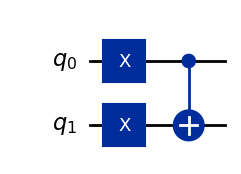

In [71]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

# Create a quantum circuit
qc_cx = QuantumCircuit(2, name="qc")
qc_cx.x(0)  # Apply X gate on the 1st qubit
qc_cx.x(1)  # Apply X gate on the 2nd qubit
qc_cx.cx(0, 1)  # Apply CX gate with 1st qubit as control and 2nd qubit as target

# Draw the quantum circuit
qc_cx.draw('mpl')


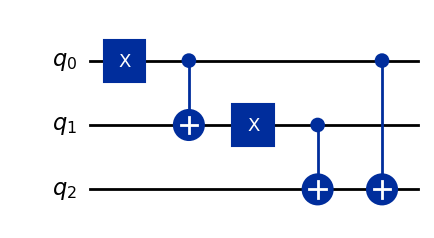

In [72]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout

# Create a quantum circuit
qc = QuantumCircuit(3)

# Apply gates to the circuit
qc.x(0)  # Apply X gate (NOT gate) on the 1st qubit
qc.cx(0, 1)  # Apply CX gate (CNOT gate) with 1st qubit as control and 2nd qubit as target
qc.x(1)  # Apply X gate (NOT gate) on the 2nd qubit
qc.cx(1, 2)  # Apply CX gate (CNOT gate) with 2nd qubit as control and 3rd qubit as target
qc.cx(0, 2)  # Apply CX gate (CNOT gate) with 1st qubit as control and 3rd qubit as target

# Draw the quantum circuit using matplotlib
qc.draw('mpl')


In [73]:
from qiskit import QuantumCircuit

# Define the combined optimization function for Rule 1 and Rule 2
def optimize_rule_1_and_2(qc):
    # Rule 1: Remove NOT gates followed by specific gates
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.name == 'x':  # Check if current gate is NOT gate
            if next_gate.name == 'ccx':  # TOFFOLI gate
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
            elif next_gate.name == 'x':  # Another NOT gate
                qc.data.pop(i)  # Remove both NOT gates
                qc.data.pop(i)  # Remove next_gate
            elif next_gate.name == 'cx':  # CNOT gate
                # Create a new controlled gate with reversed control qubit
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
        else:
            i += 1
    
    # Rule 2: Remove gates adjacent to their inverse
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.inverse().name == next_gate.name:
            qc.data.pop(i)  # Remove current gate
            qc.data.pop(i)  # Remove next gate
        else:
            i += 1

# Create a sample quantum circuit
qc = QuantumCircuit(3)

# Apply gates to the circuit
qc.x(0)  # NOT gate
qc.cx(0, 1)  # CNOT gate
qc.x(1)  # NOT gate
qc.cx(1, 2)  # CNOT gate
qc.cx(0, 2)  # CNOT gate

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 1 and Rule 2
optimize_rule_1_and_2(qc)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc)


Original circuit:
     ┌───┐                    
q_0: ┤ X ├──■──────────────■──
     └───┘┌─┴─┐┌───┐       │  
q_1: ─────┤ X ├┤ X ├──■────┼──
          └───┘└───┘┌─┴─┐┌─┴─┐
q_2: ───────────────┤ X ├┤ X ├
                    └───┘└───┘

Optimized circuit:
          
q_0: ──■──
       │  
q_1: ──┼──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘


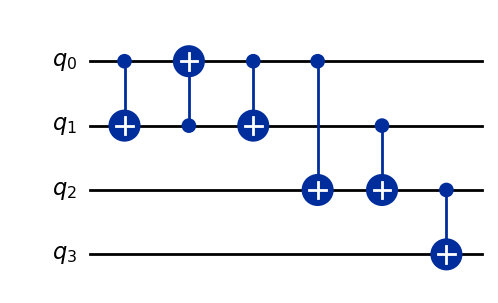

In [74]:
from qiskit import QuantumCircuit

# Create an original quantum circuit with Swap and Bridge gate functionalities
qc_original = QuantumCircuit(4)

# Swap gate functionality using CNOT gates
qc_original.cx(0, 1)
qc_original.cx(1, 0)
qc_original.cx(0, 1)

# Bridge gate functionality using CNOT gates
qc_original.cx(0, 2)
qc_original.cx(1, 2)
qc_original.cx(2, 3)

# Draw the original circuit
qc_original.draw(output='mpl')


In [75]:
from qiskit import QuantumCircuit

# Create a Quantum Circuit with a Swap gate
qc_swap = QuantumCircuit(2)
qc_swap.swap(0, 1)

print("original circuit (Swap gate):")
print(qc_swap)
# Decompose the Swap gate into CNOT gates
qc_swap_decomposed = qc_swap.decompose()

# Print the decomposed circuit
print("Decomposed circuit (Swap gate):")
print(qc_swap_decomposed)


original circuit (Swap gate):
        
q_0: ─X─
      │ 
q_1: ─X─
        
Decomposed circuit (Swap gate):
          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘


# RULE 1
### Remove gates that are directly adjacent to their inverse. In a two-qubit gate, it is usually possible to simplify or eliminate the gate in the form of quantum circuits by moving it between the gates. In fact, for each U gate in the circuit, the optimizer searches for an instance of U†. If present, U is successfully canceled with some instances of U†
.


In [76]:
from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile

# Define the original quantum circuit
# Example usage
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 1)
qc.x(1)
qc.cx(1, 2)
qc.cx(0, 3)
qc.h(3)
qc.cx(2, 3)
qc.cx(1, 2)  # Adjacent inverse gates with qc.cx(1, 2) above
qc.cz(0, 2)
qc.y(0)
qc.z(1)
qc.cx(0, 1)  # Adjacent inverse gates with qc.cx(0, 1) above
qc.cy(2, 3)


# Define the optimized quantum circuit
qc_optimized = qc.copy()
# Apply optimization transformations to qc_optimized
def optimize_rule_2(qc):
    """
    Optimize a quantum circuit by removing adjacent pairs of inverse gates.

    Args:
        qc (QuantumCircuit): The quantum circuit to optimize.

    Returns:
        QuantumCircuit: The optimized quantum circuit.
    """
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]

        # Check if the next gate is the inverse of the current gate
        if current_gate.inverse().name == next_gate.name:
            # Remove both the current gate and the next gate
            qc.data.pop(i)
            qc.data.pop(i)

            # Do not increment i since the next gate after removal will be at index i again
        else:
            # Move to the next pair of gates
            i += 1

    return qc
# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 1
optimize_rule_2(qc_optimized)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc_optimized)





Original circuit:
     ┌───┐                                      ┌───┐     
q_0: ┤ H ├──■────■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ──────────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                         ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ────────────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                         └───┘└───┘└───┘        └───┘     

Optimized circuit:
     ┌───┐   ┌───┐     
q_0: ┤ H ├─■─┤ Y ├──■──
     ├───┤ │ ├───┤┌─┴─┐
q_1: ┤ X ├─┼─┤ Z ├┤ X ├
     └───┘ │ └───┘└───┘
q_2: ──────■───■───────
     ┌───┐   ┌─┴─┐     
q_3: ┤ H ├───┤ Y ├─────
     └───┘   └───┘     


Original num gates: 13
Optimized num gates: 9
Execution time for original circuit: 2.04e-05
Execution time for optimized circuit: 4.69e-05


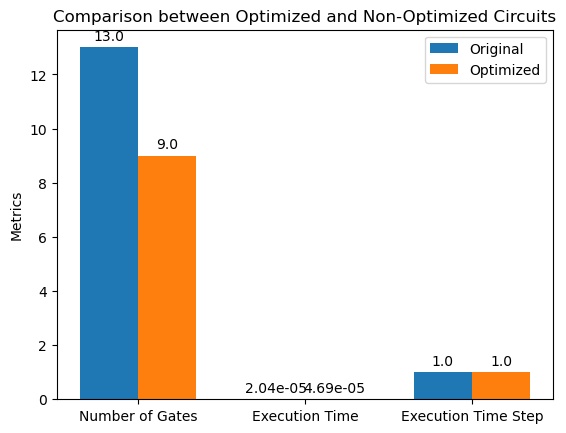

In [80]:
# Choose a backend (e.g., Aer simulator)
backend = Aer.get_backend('qasm_simulator')

# Transpile the original circuit and measure execution time
job_original = transpile(qc, backend)
num_gates_original = sum(qc.count_ops().values())
job_original_result = backend.run(job_original).result()
execution_time_original = job_original_result.results[0].metadata['time_taken']
print("Original num gates:", num_gates_original)

# Transpile the optimized circuit and measure execution time
job_optimized = transpile(qc_optimized, backend)
num_gates_optimized = sum(qc_optimized.count_ops().values())
job_optimized_result = backend.run(job_optimized).result()
execution_time_optimized = job_optimized_result.results[0].metadata['time_taken']
print("Optimized num gates:", num_gates_optimized)

# Print the execution times
print("Execution time for original circuit:", execution_time_original)
print("Execution time for optimized circuit:", execution_time_optimized)


# Assuming both circuits have the same execution time step (1)
execution_time_step_original = 1
execution_time_step_optimized = 1

# Prepare data for plotting
labels = ['Number of Gates', 'Execution Time', 'Execution Time Step']
original_data = [num_gates_original, execution_time_original, execution_time_step_original]
optimized_data = [num_gates_optimized, execution_time_optimized, execution_time_step_optimized]

# Plotting
x = list(range(len(labels)))  # Convert range object to list
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([val - width/2 for val in x], original_data, width, label='Original')  # Adjust x-coordinates
rects2 = ax.bar([val + width/2 for val in x], optimized_data, width, label='Optimized')  # Adjust x-coordinates

ax.set_ylabel('Metrics')
ax.set_title('Comparison between Optimized and Non-Optimized Circuits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Labeling the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


# RULE 2

### First, if there is a NOT gate in the circuit, the next gate is checked. In this case, there are three diferent possibilities for the next gates.
### If the next gate is a TOFFOLI gate: in this case the control qubit of the TOFFOLI is reversed and the NOT gate is removed.
### If the next gate is a NOT gate: in this case the two NOT gates are removed.
### If the next gate is a CNOT gate: in this case the control qubit is reversed and the NOT gate is removed

In [78]:
# from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile
import matplotlib.pyplot as plt

# Define the original quantum circuit
qc = QuantumCircuit(4)

# Apply gates to the circuit
qc.x(0)  # NOT gate
qc.cx(0, 1)  # CNOT gate
qc.x(1)  # NOT gate
qc.cx(1, 2)  # CNOT gate
qc.cx(0, 3)  # CNOT gate
qc.cx(2, 3)  # CNOT gate
qc.x(3)  # NOT gate
qc.cx(1, 2)  # CNOT gate
qc.cx(2, 3)  # CNOT gate
qc.x(2)  # NOT gate
qc.cx(1, 3)  # CNOT gate
qc.cx(0, 2)  # CNOT gate
qc.cx(0, 3)  # CNOT gate

# Define the optimized quantum circuit
qc_optimized = qc.copy()  # Copy the original circuit for optimization

# Define the optimization function for Rule 1
def optimize_rule_1(qc):
    i = 0
    while i < len(qc.data) - 1:
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]
        
        if current_gate.name == 'x':  # Check if current gate is NOT gate
            if next_gate.name == 'ccx':  # TOFFOLI gate
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
            elif next_gate.name == 'x':  # Another NOT gate
                qc.data.pop(i)  # Remove both NOT gates
                qc.data.pop(i)  # Remove next_gate
            elif next_gate.name == 'cx':  # CNOT gate
                # Create a new controlled gate with reversed control qubit
                next_gate.control(0)
                qc.data.pop(i)  # Remove NOT gate
        else:
            i += 1

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using Rule 1
optimize_rule_1(qc_optimized)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc_optimized)




Original circuit:
     ┌───┐                                                       
q_0: ┤ X ├──■─────────■──────────────────────────────────■────■──
     └───┘┌─┴─┐┌───┐  │                                  │    │  
q_1: ─────┤ X ├┤ X ├──┼────■─────────■──────────────■────┼────┼──
          └───┘└───┘  │  ┌─┴─┐     ┌─┴─┐     ┌───┐  │  ┌─┴─┐  │  
q_2: ─────────────────┼──┤ X ├──■──┤ X ├──■──┤ X ├──┼──┤ X ├──┼──
                    ┌─┴─┐└───┘┌─┴─┐├───┤┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐
q_3: ───────────────┤ X ├─────┤ X ├┤ X ├┤ X ├─────┤ X ├─────┤ X ├
                    └───┘     └───┘└───┘└───┘     └───┘     └───┘

Optimized circuit:
                                                  
q_0: ──■─────────■────────────────────────■────■──
     ┌─┴─┐       │                        │    │  
q_1: ┤ X ├──■────┼─────────■─────────■────┼────┼──
     └───┘┌─┴─┐  │       ┌─┴─┐       │  ┌─┴─┐  │  
q_2: ─────┤ X ├──┼────■──┤ X ├──■────┼──┤ X ├──┼──
          └───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐┌─┴─┐└───┘┌─┴─┐
q_3: ──────

Original num gates: 13
Optimized num gates: 9
Execution time for original circuit: 4.2e-05
Execution time for optimized circuit: 4.26e-05


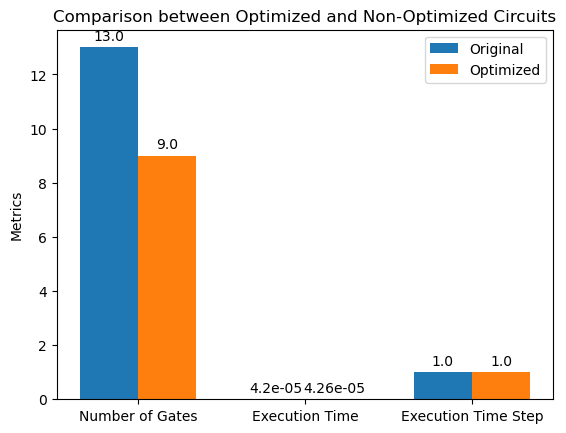

In [79]:
# Choose a backend (e.g., Aer simulator)
backend = Aer.get_backend('qasm_simulator')

# Transpile the original circuit and measure execution time
job_original = transpile(qc, backend)
num_gates_original = sum(qc.count_ops().values())
job_original_result = backend.run(job_original).result()
execution_time_original = job_original_result.results[0].metadata['time_taken']
print("Original num gates:", num_gates_original)

# Transpile the optimized circuit and measure execution time
job_optimized = transpile(qc_optimized, backend)
num_gates_optimized = sum(qc_optimized.count_ops().values())
job_optimized_result = backend.run(job_optimized).result()
execution_time_optimized = job_optimized_result.results[0].metadata['time_taken']
print("Optimized num gates:", num_gates_optimized)

# Print the execution times
print("Execution time for original circuit:", execution_time_original)
print("Execution time for optimized circuit:", execution_time_optimized)


# Assuming both circuits have the same execution time step (1)
execution_time_step_original = 1
execution_time_step_optimized = 1

# Prepare data for plotting
labels = ['Number of Gates', 'Execution Time', 'Execution Time Step']
original_data = [num_gates_original, execution_time_original, execution_time_step_original]
optimized_data = [num_gates_optimized, execution_time_optimized, execution_time_step_optimized]

# Plotting
x = list(range(len(labels)))  # Convert range object to list
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([val - width/2 for val in x], original_data, width, label='Original')  # Adjust x-coordinates
rects2 = ax.bar([val + width/2 for val in x], optimized_data, width, label='Optimized')  # Adjust x-coordinates

ax.set_ylabel('Metrics')
ax.set_title('Comparison between Optimized and Non-Optimized Circuits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Labeling the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [2]:
from qiskit import QuantumCircuit

# Define the combined optimization function
def optimize_circuit(qc):
    """
    Optimize a quantum circuit by applying multiple optimization rules.

    Args:
        qc (QuantumCircuit): The quantum circuit to optimize.

    Returns:
        QuantumCircuit: The optimized quantum circuit.
    """
    optimize_rule_1(qc)
    optimize_rule_2(qc)
    return qc

# Create a sample quantum circuit
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 1)
qc.x(1)
qc.cx(1, 2)
qc.cx(0, 3)
qc.h(3)
qc.cx(2, 3)
qc.cx(1, 2)  # Adjacent inverse gates with qc.cx(1, 2) above
qc.cz(0, 2)
qc.y(0)
qc.z(1)
qc.cx(0, 1)  # Adjacent inverse gates with qc.cx(0, 1) above
qc.cy(2, 3)

# Define the optimized quantum circuit
qc_optimized = qc.copy() 

# Print the original circuit
print("Original circuit:")
print(qc)

# Optimize the circuit using combined rules
optimize_circuit(qc_optimized)

# Print the optimized circuit
print("\nOptimized circuit:")
print(qc_optimized)

# Choose a backend (e.g., Aer simulator)
backend = Aer.get_backend('qasm_simulator')

# Transpile the original circuit and measure execution time
job_original = transpile(qc, backend)
num_gates_original = sum(qc.count_ops().values())
job_original_result = backend.run(job_original).result()
execution_time_original = job_original_result.results[0].metadata['time_taken']
print("Original num gates:", num_gates_original)

# Transpile the optimized circuit and measure execution time
job_optimized = transpile(qc_optimized, backend)
num_gates_optimized = sum(qc_optimized.count_ops().values())
job_optimized_result = backend.run(job_optimized).result()
execution_time_optimized = job_optimized_result.results[0].metadata['time_taken']
print("Optimized num gates:", num_gates_optimized)

# Print the execution times
print("Execution time for original circuit:", execution_time_original)
print("Execution time for optimized circuit:", execution_time_optimized)


# Assuming both circuits have the same execution time step (1)
execution_time_step_original = 1
execution_time_step_optimized = 1

# Prepare data for plotting
labels = ['Number of Gates', 'Execution Time', 'Execution Time Step']
original_data = [num_gates_original, execution_time_original, execution_time_step_original]
optimized_data = [num_gates_optimized, execution_time_optimized, execution_time_step_optimized]

# Plotting
x = list(range(len(labels)))  # Convert range object to list
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([val - width/2 for val in x], original_data, width, label='Original')  # Adjust x-coordinates
rects2 = ax.bar([val + width/2 for val in x], optimized_data, width, label='Optimized')  # Adjust x-coordinates

ax.set_ylabel('Metrics')
ax.set_title('Comparison between Optimized and Non-Optimized Circuits')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Labeling the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


Original circuit:
     ┌───┐                                      ┌───┐     
q_0: ┤ H ├──■────■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ──────────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                         ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ────────────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                         └───┘└───┘└───┘        └───┘     


NameError: name 'optimize_rule_1' is not defined

In [3]:
qc = QuantumCircuit(4)
qc.rz(0.3, 0)
qc.rz(0.5, 0)
qc.rz(0.8, 1)
qc.rz(1.2, 1)
qc.rz(0.6, 2)
qc.rz(0.7, 3)

print("Original circuit:")
print(qc)

Original circuit:
     ┌─────────┐┌─────────┐
q_0: ┤ Rz(0.3) ├┤ Rz(0.5) ├
     ├─────────┤├─────────┤
q_1: ┤ Rz(0.8) ├┤ Rz(1.2) ├
     ├─────────┤└─────────┘
q_2: ┤ Rz(0.6) ├───────────
     ├─────────┤           
q_3: ┤ Rz(0.7) ├───────────
     └─────────┘           


In [7]:
def optimize_rule_3(qc):
    for i in range(len(qc.data) - 1):
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]

        if current_gate.name == "rz" and next_gate.name == "rz":
            if current_gate.control == next_gate.control:
                # Merge rotation angles
                merged_angle = current_gate.params[0] + next_gate.params[0]
                # Create a new RZ gate with the merged angle
                merged_gate = RZGate(merged_angle, current_gate.control)
                # Replace the two adjacent RZ gates with the merged gate
                qc.data[i] = (merged_gate, qc.data[i][1])
                qc.data.pop(i + 1)



In [9]:
def optimize_rule_3(qc):
    for i in range(len(qc.data) - 1):
        current_gate = qc.data[i][0]
        next_gate = qc.data[i + 1][0]

        if (current_gate.__class__ == RZGate and next_gate.__class__ == RZGate and
                current_gate.control == next_gate.control):
            # Merge rotation angles
            merged_angle = current_gate.params[0] + next_gate.params[0]
            # Create a new RZ gate with the merged angle
            merged_gate = RZGate(merged_angle, current_gate.control)
            # Replace the two adjacent RZ gates with the merged gate
            qc.data[i] = (merged_gate, qc.data[i][1])
            qc.data.pop(i + 1)


# Create a sample circuit
qc = QuantumCircuit(2)
qc.h(0)  # Hadamard on qubit 0
qc.rz(0.2, [0])  # RZ gate with angle 0.2 on qubit 0 (control)
qc.x(0)  # NOT gate on qubit 0
qc.rz(0.5, [0])  # RZ gate with angle 0.5 on qubit 0 (control)
qc.cx(0, 1)  # CNOT gate controlled by qubit 0 on qubit 1

# Print the original circuit
print("Original Circuit:")
print(qc.draw(output='text'))

# Apply optimization rules

optimize_rule_3(qc)

# Print the optimized circuit
print("\nOptimized Circuit:")
print(qc.draw(output='text'))

Original Circuit:
     ┌───┐┌─────────┐┌───┐┌─────────┐     
q_0: ┤ H ├┤ Rz(0.2) ├┤ X ├┤ Rz(0.5) ├──■──
     └───┘└─────────┘└───┘└─────────┘┌─┴─┐
q_1: ────────────────────────────────┤ X ├
                                     └───┘


NameError: name 'RZGate' is not defined

In [10]:
from qiskit import QuantumCircuit

# Define a complex quantum circuit
def create_complex_circuit():
    qc = QuantumCircuit(4)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 1)
    qc.x(1)
    qc.cx(1, 2)
    qc.cx(0, 3)
    qc.h(3)
    qc.cx(2, 3)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.y(0)
    qc.z(1)
    qc.cx(0, 1)
    qc.cy(2, 3)
    return qc

# Gate synthesis using a set of universal gates
def gate_synthesis(qc):
    # Replace non-universal gates with equivalent gates composed of universal gates
    qc = qc.decompose()
    return qc

# Display the original circuit
print("Original Circuit:")
original_circuit = create_complex_circuit()
print(original_circuit)

# Synthesize gates using a set of universal gates
synthesized_circuit = gate_synthesis(original_circuit)

# Display the circuit after gate synthesis
print("\nCircuit after Gate Synthesis:")
print(synthesized_circuit)


Original Circuit:
     ┌───┐                                      ┌───┐     
q_0: ┤ H ├──■────■─────────■──────────────────■─┤ Y ├──■──
     └───┘┌─┴─┐┌─┴─┐┌───┐  │                  │ ├───┤┌─┴─┐
q_1: ─────┤ X ├┤ X ├┤ X ├──┼────■─────────■───┼─┤ Z ├┤ X ├
          └───┘└───┘└───┘  │  ┌─┴─┐     ┌─┴─┐ │ └───┘└───┘
q_2: ──────────────────────┼──┤ X ├──■──┤ X ├─■───■───────
                         ┌─┴─┐├───┤┌─┴─┐└───┘   ┌─┴─┐     
q_3: ────────────────────┤ X ├┤ H ├┤ X ├────────┤ Y ├─────
                         └───┘└───┘└───┘        └───┘     

Circuit after Gate Synthesis:
     ┌─────────┐                                                            »
q_0: ┤ U2(0,π) ├──■────■─────────────────■──────────────────────────────────»
     └─────────┘┌─┴─┐┌─┴─┐┌───────────┐  │                         ┌───────┐»
q_1: ───────────┤ X ├┤ X ├┤ U3(π,0,π) ├──┼───────■─────────────■───┤ U1(π) ├»
                └───┘└───┘└───────────┘  │     ┌─┴─┐         ┌─┴─┐ └─┬───┬─┘»
q_2: ─────────────────────────

In [12]:
from qiskit import QuantumCircuit
import numpy as np
# Create a complex quantum circuit
def create_complex_circuit():
    qc = QuantumCircuit(4)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    qc.cx(2, 1)
    qc.h(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    qc.cx(2, 1)
    qc.h(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    qc.cx(2, 1)
    qc.h(2)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 0)
    qc.cx(2, 1)
    qc.h(2)
    return qc

# Synthesize the complex circuit using basic gates
def synthesize_circuit(qc):
    # Create a new quantum circuit
    new_qc = QuantumCircuit(qc.num_qubits)
    
    # Apply gate synthesis rules here
    
    # Example: Decompose all gates into CX and U gates
    for instruction, qargs, cargs in qc.data:
        if instruction.name == 'h':
            new_qc.u(np.pi / 2, 0, np.pi, qargs[0])
        elif instruction.name == 'cx':
            new_qc.cx(qargs[0], qargs[1])
        # Add more gate synthesis rules as needed
        
    return new_qc

# Create the complex circuit
complex_circuit = create_complex_circuit()

# Synthesize the complex circuit using basic gates
synthesized_circuit = synthesize_circuit(complex_circuit)

# Print the synthesized circuit
print("Synthesized Circuit:")
print(synthesized_circuit)


Synthesized Circuit:
     ┌────────────┐               ┌───┐                             ┌───┐     »
q_0: ┤ U(π/2,0,π) ├──■────────────┤ X ├───────────■─────────────────┤ X ├─────»
     └────────────┘┌─┴─┐          └─┬─┘┌───┐    ┌─┴─┐               └─┬─┘┌───┐»
q_1: ──────────────┤ X ├──■─────────┼──┤ X ├────┤ X ├───────■─────────┼──┤ X ├»
                   └───┘┌─┴─┐       │  └─┬─┘┌───┴───┴────┐┌─┴─┐       │  └─┬─┘»
q_2: ───────────────────┤ X ├──■────┼────■──┤ U(π/2,0,π) ├┤ X ├──■────┼────■──»
                        └───┘┌─┴─┐  │       └────────────┘└───┘┌─┴─┐  │       »
q_3: ────────────────────────┤ X ├──■──────────────────────────┤ X ├──■───────»
                             └───┘                             └───┘          »
«                             ┌───┐                             ┌───┐     »
«q_0: ──────■─────────────────┤ X ├───────────■─────────────────┤ X ├─────»
«         ┌─┴─┐               └─┬─┘┌───┐    ┌─┴─┐               └─┬─┘┌───┐»
«q_1: ────┤ X ├───────■────────

In [2]:
bm

NameError: name 'bm' is not defined